## Import dependencies 

In [26]:
import numpy as np
from PIL import Image
import insightface
from insightface.app import FaceAnalysis
import os
import cv2
from insightface.data import get_image as ins_get_image
from matplotlib import pyplot as plt
import time

# Analysis of just two images

## Choose two images to compare

In [69]:
#Images to compare
choice_one = Image.open('Images/Lord_farquaad.jpg')
choice_two = Image.open('Images/forska_hanna.jpg')

## Extract feature vectors from the two choices

In [70]:
# Initialize the FaceAnalysis app
app = FaceAnalysis()
app.prepare(ctx_id=0, det_size=(640, 640))  # ctx_id=-1 for CPU, 0 for GPU

# Get feature vector for the first image 
image = choice_one
image = image.resize((640, 640))
img = np.array(image)[:, :, ::-1]
img_one = app.get(img)

for idx, face in enumerate(img_one):
    #print(f"Face {idx+1} Embedding:", face.embedding)  # ArcFace embeddings
    face_one = face.normed_embedding
    #print("Age: ", face.age)
    
# Get feature vector for the second image    
image_second = choice_two
image_second = image_second.resize((640, 640))
img_second = np.array(image_second)[:, :, ::-1]
img_two = app.get(img_second)

for idx, face_second in enumerate(img_two):
    #print(f"Face {idx+1} Embedding:", face.embedding)  # ArcFace embeddings
    face_two = face_second.normed_embedding
    #print("Age: ", face_second.age)

Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: C:\Users\tyra_/.insightface\models\buffalo_l\1k3d68.onnx landmark_3d_68 ['None', 3, 192, 192] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: C:\Users\tyra_/.insightface\models\buffalo_l\2d106det.onnx landmark_2d_106 ['None', 3, 192, 192] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: C:\Users\tyra_/.insightface\models\buffalo_l\det_10g.onnx detection [1, 3, '?', '?'] 127.5 128.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: C:\Users\tyra_/.insightface\models\buffalo_l\genderage.onnx genderage ['None', 3, 96, 96] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: C:\Users\tyra_/.insightface\models\buffalo_l\w600k_r50.onnx recognition ['None', 3, 112, 112] 127.

## Cosine distance for the two choices

In [71]:
def findCosineDistance(source_representation, test_representation): #takes two feature vectors
    a = np.matmul(np.transpose(source_representation),test_representation)
    b = np.sum(np.multiply(source_representation, source_representation))
    c = np.sum(np.multiply(test_representation, test_representation))
    return 1-(a / (np.sqrt(b) * np.sqrt(c)))

findCosineDistance(face_one, face_two)

0.9041515439748764

## Show bounding box and face detection for the two choices

Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: C:\Users\tyra_/.insightface\models\buffalo_l\1k3d68.onnx landmark_3d_68 ['None', 3, 192, 192] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: C:\Users\tyra_/.insightface\models\buffalo_l\2d106det.onnx landmark_2d_106 ['None', 3, 192, 192] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: C:\Users\tyra_/.insightface\models\buffalo_l\det_10g.onnx detection [1, 3, '?', '?'] 127.5 128.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: C:\Users\tyra_/.insightface\models\buffalo_l\genderage.onnx genderage ['None', 3, 96, 96] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: C:\Users\tyra_/.insightface\models\buffalo_l\w600k_r50.onnx recognition ['None', 3, 112, 112] 127.

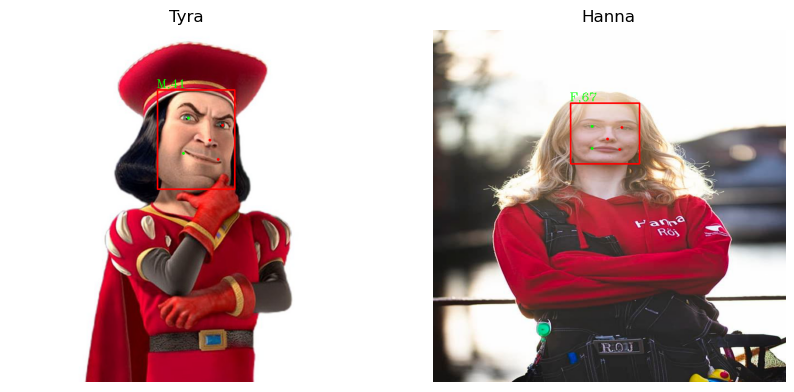

In [72]:
app = FaceAnalysis(name="buffalo_l")
app.prepare(ctx_id=0, det_size=(640, 640))

image_one = choice_one
image_one = image_one.resize((640, 640))

image_two = choice_two
image_two = image_two.resize((640, 640))

# Convert the resized images to NumPy arrays and then from RGB to BGR
img_one = np.array(image_one)[:, :, ::-1]
img_two = np.array(image_two)[:, :, ::-1]

# List to hold processed images
processed_images = []
faces = []

# Process each image individually
for img in [img_one, img_two]:
    face = app.get(img)
    rimg = app.draw_on(img, face)
    faces.append(face)
    processed_images.append(rimg)

# Display each processed image
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].imshow(cv2.cvtColor(processed_images[0], cv2.COLOR_BGR2RGB))
axs[0].set_title("Tyra")
axs[1].imshow(cv2.cvtColor(processed_images[1], cv2.COLOR_BGR2RGB))
axs[1].set_title("Hanna")

for ax in axs:
    ax.axis("off")

plt.show()

In [65]:
import torch

# Extract embeddings from the features list
embeddings_one = [face_one]#np.array([face['embedding'] for face in face_one])

embeddings_two = [face_two]#np.array([face['embedding'] for face in face_two])

# Print the result
#print(embeddings_one)

#similarity = handler.compute_sim(embeddings_one, embeddings_two)
#print("similarity score: ", similarity)

# Convert embeddings to PyTorch tensors
embeddings_one_tensor = torch.tensor(embeddings_one)
embeddings_one_tensor = embeddings_one_tensor / torch.norm(embeddings_one_tensor)
embeddings_two_tensor = torch.tensor(embeddings_two)
embeddings_two_tensor = embeddings_two_tensor / torch.norm(embeddings_two_tensor)


features = [embeddings_one_tensor,embeddings_two_tensor]
#print(features)
similarity_scores = torch.cat(features) @ torch.cat(features).T 
print("Cosine similarity between the two images: ")
print(similarity_scores)


# Adaface 101: 0.74865687
# Adaface Custom: 0.7468151
# Buffalo_l: 0.6963753

Cosine similarity between the two images: 
tensor([[1.0000, 0.0241],
        [0.0241, 1.0000]])


# Code for the big data set

## Extract features from the big data set

In [ ]:
# Initialize FaceAnalysis
app = FaceAnalysis(name="buffalo_l")
app = FaceAnalysis()
app.prepare(ctx_id=0, det_size=(640, 640))
# Path to folder
folder_path = r"C:\Users\tyra_\Comp_Science_project\A-Modified-Pipeline-for-Face-Recognition\AgeDB"
# Get all image files from the folder
image_files = [f for f in os.listdir(folder_path) if f.endswith(('jpg', 'jpeg', 'png'))]
#feature_vectors = []
Images_w_drawing = []


def extract_features(image_file):
    # Loop through all image files
        image_path = os.path.join(folder_path, image_file)
        # Open and preprocess the image
        image = Image.open(image_path)
        image = image.resize((640, 640))
        image = np.array(image) # Convert to BGR if necessary

        # If the image is grayscale, convert it to RGB by stacking the single channel
        if len(image.shape) == 2:  # Grayscale image has shape (H, W)
            image = np.stack([image, image, image], axis=-1)  # Stack the single channel into 3
        elif image.shape[2] == 1:  # Grayscale image with shape (H, W, 1)
            image = np.repeat(image, 3, axis=-1)  # Repeat the channel 3 times
            
        image = np.array(image)[:, :, ::-1]  # Convert to BGR if necessary
        
        # Get the feature vector
        face_feature = app.get(image)
        # If no face is detected, try adding padding
        if not face_feature:
            print(f"No face detected in image: {image_file}, adding padding")
            # Add padding 
            padding_color = [255, 255, 255]  # Black padding
            padded_image = cv2.copyMakeBorder(
                image, 
                top=50, bottom=50, left=50, right=50, 
                borderType=cv2.BORDER_CONSTANT, 
                value=padding_color
            )
            face_feature = app.get(padded_image)
            draw_on_img = app.draw_on(padded_image, face_feature)
            if not face_feature:
                print("No face detected in image with padding.")
        
        #feature_vectors.append(face_feature)
        draw_on_img = app.draw_on(image, face_feature)
        Images_w_drawing.append(draw_on_img)
        
        return draw_on_img

for image_file in image_files[:100]:
    draw_on_img = extract_features(image_file)
    # Display the image
    plt.figure(figsize=(4, 4))
    plt.imshow(cv2.cvtColor(draw_on_img, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB for display
    plt.axis("off")
    plt.title(f"Processed Image: {image_file}")
    plt.show()
    
# Now, feature_vectors will have the feature vectors for all images
